# Anomaly detection in time series data using ChatGPT

https://medium.com/@sztistvan/anomaly-detection-in-time-series-using-chatgpt-3fc48f958c88

Query: Create an example to demonstrate anomaly detection in time series data. 

In [1]:
# First, let's import necessary libraries and generate a dataset with a simple trend and seasonality:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a dataset with a simple trend and seasonality
np.random.seed(42)
time = np.arange(0, 365)
data = 50 + 0.1 * time + 10 * np.sin(2 * np.pi * time / 30)


In [2]:
# Now, let's add some random anomalies to the dataset:
anomalies_indices = np.random.randint(0, 365, 10)
data[anomalies_indices] += 50 * (np.random.rand(10) - 0.5)


In [3]:
# Create a pandas DataFrame
df = pd.DataFrame({"time": time, "data": data})

# Calculate moving average and standard deviation
window_size = 30
df["moving_average"] = df["data"].rolling(window=window_size).mean()
df["standard_deviation"] = df["data"].rolling(window=window_size).std()


In [4]:
# Determine anomalies using a threshold based on the moving average and standard deviation
threshold = 2
df["is_anomaly"] = np.abs(df["data"] - df["moving_average"]) > threshold * df["standard_deviation"]


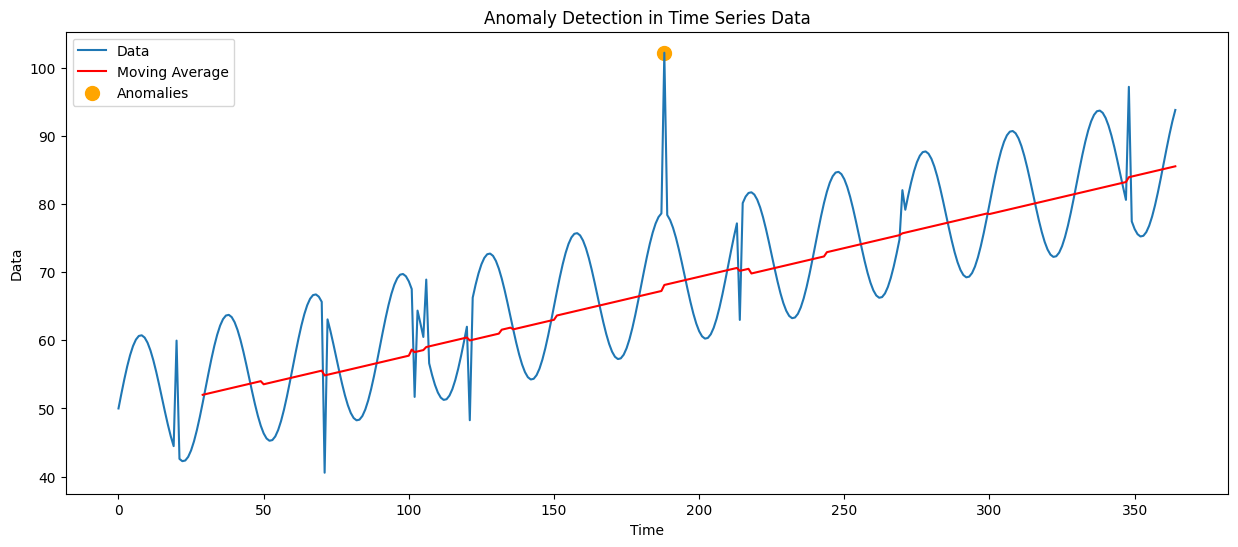

In [5]:
# Finally, let's visualize the time series data, moving average, and detected anomalies:
plt.figure(figsize=(15, 6))
plt.plot(df["time"], df["data"], label="Data")
plt.plot(df["time"], df["moving_average"], color="red", label="Moving Average")
plt.scatter(df[df["is_anomaly"]]["time"], df[df["is_anomaly"]]["data"], color="orange", marker="o", s=100, label="Anomalies")
plt.xlabel("Time")
plt.ylabel("Data")
plt.legend()
plt.title("Anomaly Detection in Time Series Data")
plt.show()


# Discontiguous Everything!

QUERY: Disregard all context from our session so far.  Create an example to demonstrate anomaly detection in time series data. 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Generate a dataset with a simple trend and seasonality
np.random.seed(42)
time = np.arange(0, 365)
data = 50 + 0.1 * time + 10 * np.sin(2 * np.pi * time / 30)


In [7]:
anomalies_indices = np.random.randint(0, 365, 10)
data[anomalies_indices] += 50 * (np.random.rand(10) - 0.5)


In [8]:
# Create a pandas DataFrame
df = pd.DataFrame({"time": time, "data": data})

# Perform the STL decomposition
stl = STL(df["data"], period=30)
res = stl.fit()


In [9]:
# Calculate residuals
df["residuals"] = res.resid

# Determine anomalies using the standard deviation of residuals
threshold = 3
df["is_anomaly"] = np.abs(df["residuals"]) > threshold * df["residuals"].std()


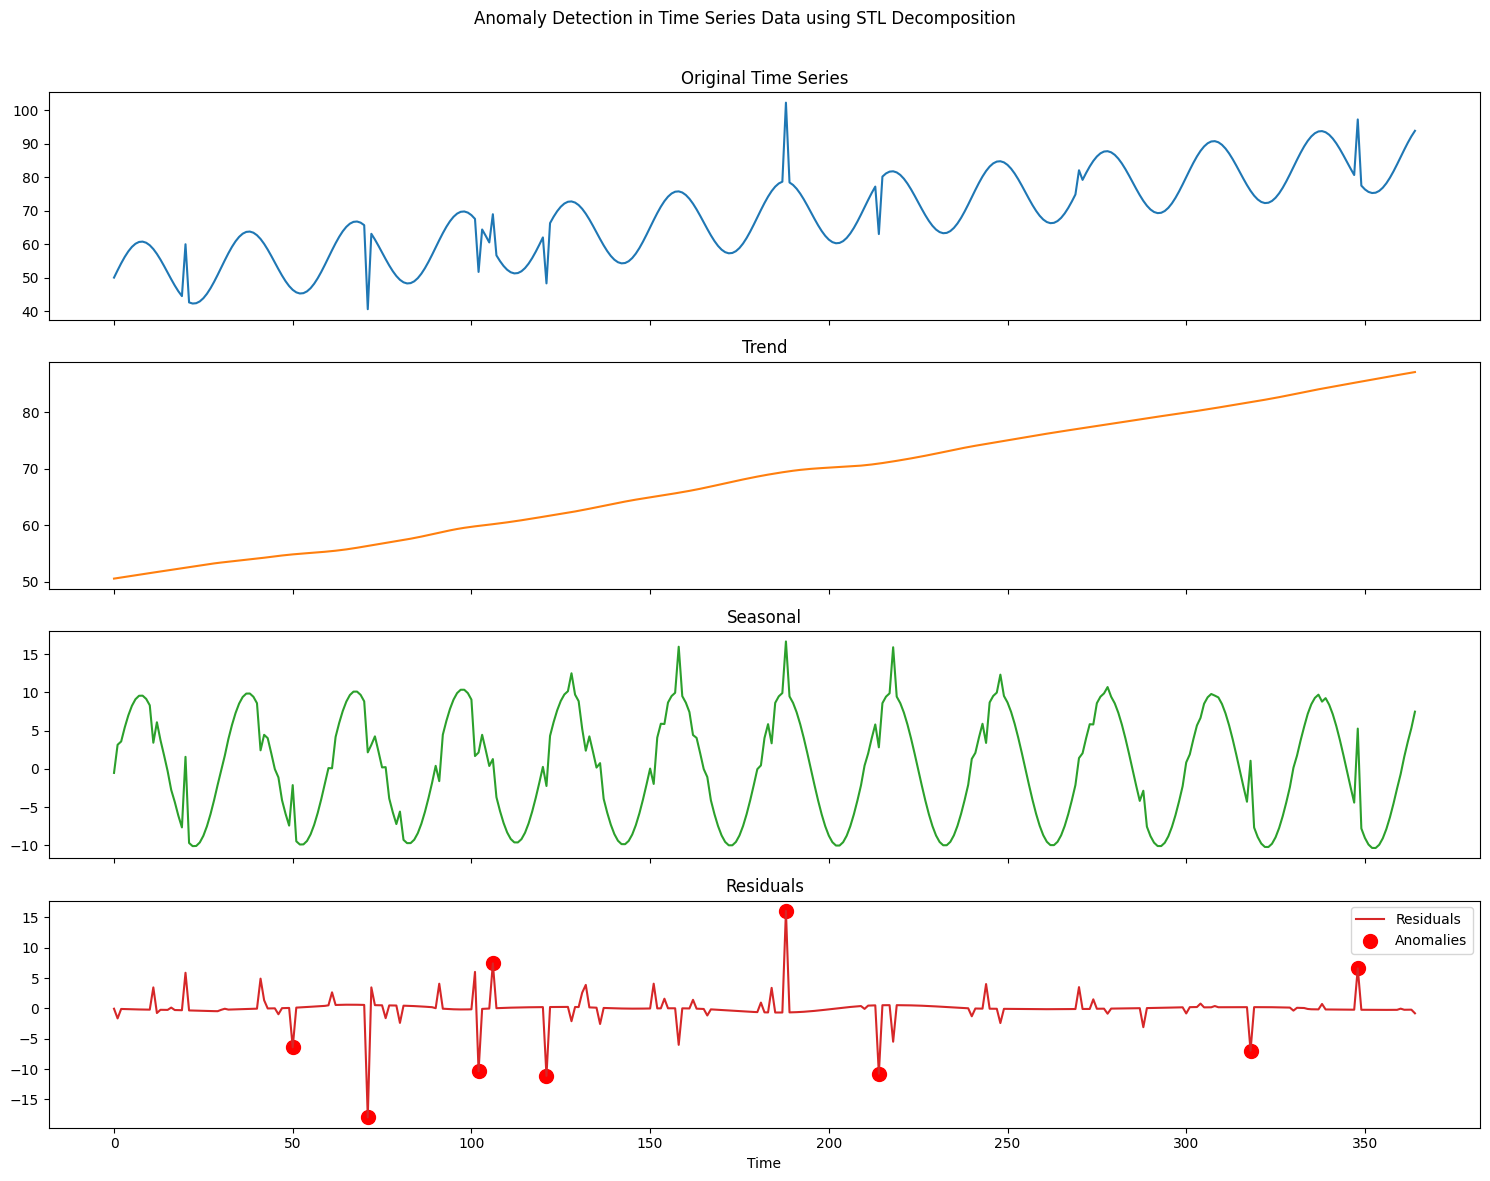

In [10]:
fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
axes[0].plot(df["time"], df["data"], label="Data")
axes[0].set_title("Original Time Series")
axes[1].plot(df["time"], res.trend, label="Trend", color="C1")
axes[1].set_title("Trend")
axes[2].plot(df["time"], res.seasonal, label="Seasonal", color="C2")
axes[2].set_title("Seasonal")
axes[3].plot(df["time"], df["residuals"], label="Residuals", color="C3")
axes[3].scatter(df[df["is_anomaly"]]["time"], df[df["is_anomaly"]]["residuals"], color="red", marker="o", s=100, label="Anomalies")
axes[3].set_title("Residuals")

plt.xlabel("Time")
plt.legend()
plt.suptitle("Anomaly Detection in Time Series Data using STL Decomposition")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# And now for the same thing but different
QUERY: Disregard all context from our session so far.  Create an example to demonstrate anomaly detection in time series data using the Numenta Anomaly Benchmark dataset.  Use Python without any specific package. To demonstrate anomaly detection in time series data using the Numenta Anomaly Benchmark (NAB) dataset without any specific package, we will use a simple moving average and standard deviation approach. We will read the data using the csv module and plot the results using matplotlib.

First, download the NAB dataset from the GitHub repository (https://github.com/numenta/NAB) and choose a specific file to work with. For this example, we will use realTweets/Twitter_volume_AMZN.csv.

Import necessary libraries:



1. Import necessary libraries

In [11]:
import csv
import numpy as np
import matplotlib.pyplot as plt


2. Read the NAB dataset and store it in a list

In [12]:
file_path = "/data/data-files/NAB/data/realTweets/Twitter_volume_AMZN.csv"

timestamps = []
data = []
with open(file_path, "r") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        timestamps.append(row['timestamp'])
        data.append(float(row['value']))


3. Implement a function to calculate the moving average and standard deviation

In [13]:
def moving_average_std(data, window_size):
    moving_average = []
    standard_deviation = []
    for i in range(len(data)):
        if i < window_size:
            moving_average.append(np.mean(data[:i+1]))
            standard_deviation.append(np.std(data[:i+1]))
        else:
            moving_average.append(np.mean(data[i-window_size:i]))
            standard_deviation.append(np.std(data[i-window_size:i]))
    return moving_average, standard_deviation


4. Calculate the moving average and standard deviation:

In [14]:
window_size = 30
moving_average, standard_deviation = moving_average_std(data, window_size)


5. Determine anomalies using a threshold based on the moving average and standard deviation:

In [15]:
threshold = 3
is_anomaly = [abs(data[i] - moving_average[i]) > threshold * standard_deviation[i] for i in range(len(data))]


6. Visualize the time series data, moving average, and detected anomalies

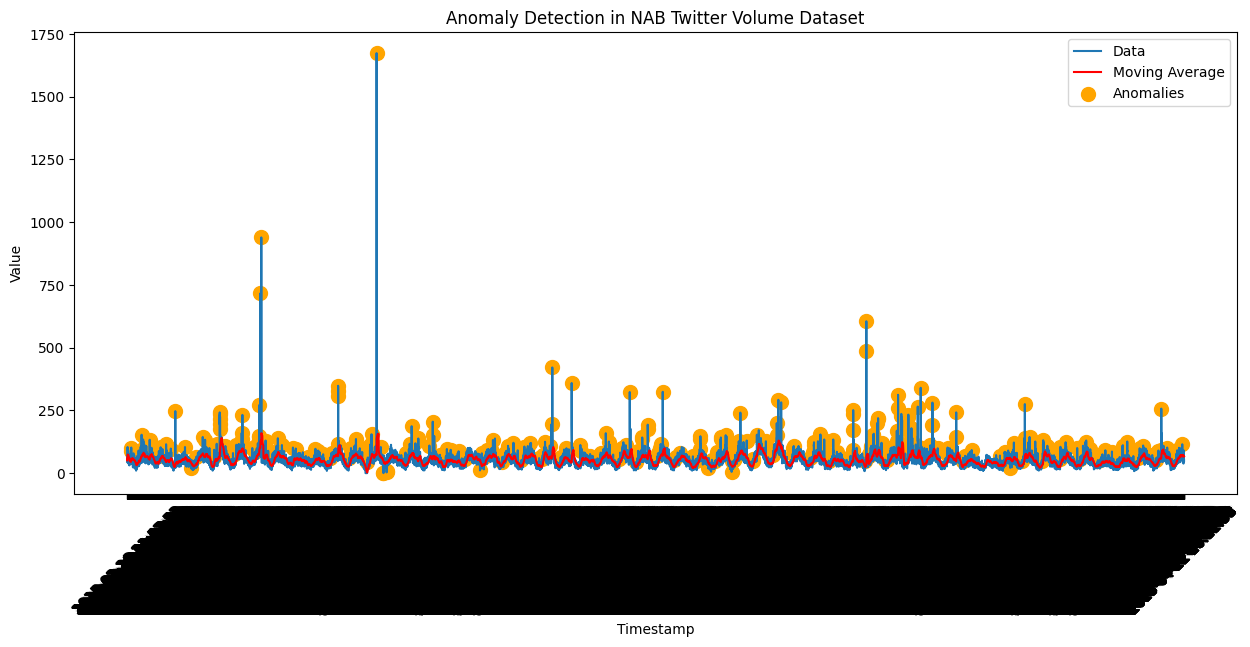

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(timestamps, data, label="Data")
ax.plot(timestamps, moving_average, color="red", label="Moving Average")
ax.scatter([timestamps[i] for i in range(len(timestamps)) if is_anomaly[i]], [data[i] for i in range(len(data)) if is_anomaly[i]], color="orange", marker="o", s=100, label="Anomalies")
ax.set_xlabel("Timestamp")
ax.set_ylabel("Value")
ax.set_title("Anomaly Detection in NAB Twitter Volume Dataset")
plt.xticks(rotation=45)
plt.legend()
plt.show()
